In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
data_frame = pd.read_csv("cluster_data.txt", sep="\t", header=None, names=["n", "x", "y"])
del data_frame["n"]

In [20]:
x_min = -2
x_max = 6
y_min = -2
y_max = 2
k_means = 2

print(f"Max\n{max}")
print(f"Min\n{min}")

Max
<built-in function max>
Min
<built-in function min>


Text(0, 0.5, 'Width')

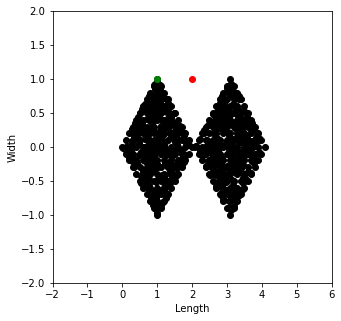

In [21]:
np.random.seed(600)
k = k_means
centroids = {
    i + 1: [np.random.randint(x_min, x_max), np.random.randint(y_min, y_max)]
    for i in range(k)
}

img = plt.figure(figsize=(5, 5))
plt.scatter(data_frame['x'], data_frame['y'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
#labels
plt.xlabel("Length")
plt.ylabel("Width")

     x    y  distance_from_1  distance_from_2  closest color
0  0.0  0.0         2.236068         1.414214        2     g
1  0.1 -0.1         2.195450         1.421267        2     g
2  0.2 -0.2         2.163331         1.442221        2     g
3  0.3 -0.3         2.140093         1.476482        2     g
4  0.4 -0.4         2.126029         1.523155        2     g


Text(0, 0.5, 'Width')

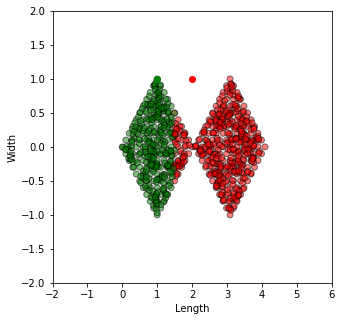

In [22]:
# Assignment Stage
def assignment(data_frame, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        data_frame['distance_from_{}'.format(i)] = (
            np.sqrt(
                (data_frame['x'] - centroids[i][0]) ** 2
                + (data_frame['y'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    data_frame['closest'] = data_frame.loc[:, centroid_distance_cols].idxmin(axis=1)
    data_frame['closest'] = data_frame['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    data_frame['color'] = data_frame['closest'].map(lambda x: colmap[x])
    return data_frame

data_frame = assignment(data_frame, centroids)
print(data_frame.head())

img = plt.figure(figsize=(5, 5))
plt.scatter(data_frame['x'], data_frame['y'], color=data_frame['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
#labels
plt.xlabel("Length")
plt.ylabel("Width")

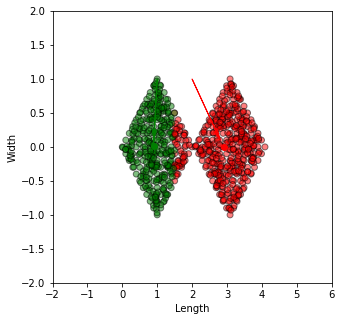

In [23]:
import copy
old_centroids = copy.deepcopy(centroids)
def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(data_frame[data_frame['closest'] == i]['x'])
        centroids[i][1] = np.mean(data_frame[data_frame['closest'] == i]['y'])
    return k


centroids = update(centroids)

img = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(data_frame['x'], data_frame['y'], color=data_frame['color'], alpha=0.5, edgecolor='k')

for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
#labels
plt.xlabel("Length")
plt.ylabel("Width")
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
    ax.arrow(old_x, old_y, dx, dy, head_width=.1, head_length=.2, fc=colmap[i], ec=colmap[i])

NameError: name 'centroiddfs' is not defined

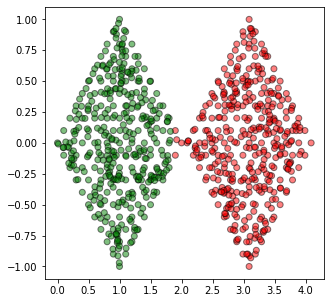

In [24]:
## Repeat Assignment Stage

data_frame = assignment(data_frame, centroids)


# Plot results
img = plt.figure(figsize=(5, 5))
plt.scatter(data_frame['x'], data_frame['y'], color=data_frame['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroiddfs[i], color=colmap[i])
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
#labels
plt.xlabel("Length")
plt.ylabel("Width")
#plt.show()



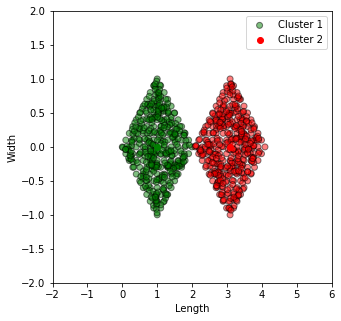

In [25]:
# Continue until all assigned categories don't change any more
while True:
    closest_centroids = data_frame['closest'].copy(deep=True)
    centroids = update(centroids)
    data_frame = assignment(data_frame, centroids)
    if closest_centroids.equals(data_frame['closest']):
        break

img = plt.figure(figsize=(5, 5))
plt.scatter(data_frame['x'], data_frame['y'], color=data_frame['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

#labels
plt.xlabel("Length")
plt.ylabel("Width")

plt.legend(['Cluster 1', 'Cluster 2'])

plt.show()